# Proyecto 03 - Procesamiento del Lenguaje Natural

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

### Exploración de datos y Procesamiento del Lenguaje Natural

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Considera que hasta que no hayas aplicado las herramientas de Procesamiento del Lenguaje Natural vistas, será difícil completar este análisis. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿qué palabras están asociadas a calificaciones positivas y qué palabras a calificaciones negativas?

### Machine Learning

Implementa un modelo que, dada la crítica de un producto, asigne la cantidad de estrellas correspondiente. **Para pensar**: ¿es un problema de Clasificación o de Regresión?

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada sus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo.
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?

**Recomendación:** si no te resulta conveniente trabajar en español con NLTK, te recomendamos que explores la librería [spaCy](https://spacy.io/).

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Valdrá la pena convertir el problema de Machine Learning en un problema binario? Es decir, asignar únicamente las etiquetas Positiva y Negativa a cada crítica y hacer un modelo que, en lugar de predecir las estrellas, prediga esa etiqueta. Pensar en qué situación puede ser útil. ¿Esperas que el desempeño sea mejor o peor?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

importo las librerias requeridas:

In [1]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import nltk

Levanto los datasets

In [2]:
dataset_dev = pd.read_json('dataset_es_dev.json', lines=True)
dataset_test =pd.read_json('dataset_es_test.json', lines=True)
dataset_train =pd.read_json('dataset_es_train.json', lines=True)

In [4]:
dataset_dev.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel


In [5]:
dataset_test.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home


In [6]:
dataset_train.head(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics


miro la informacion de los datasets

In [7]:
dataset_dev.shape

(5000, 8)

In [10]:
dataset_dev.describe()

,stars
count,5000.000000
mean,3.000000
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [11]:
dataset_test.shape

(5000, 8)

In [12]:
dataset_test.describe()

,stars
count,5000.000000
mean,3.000000
std,1.414355
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [13]:
dataset_train.shape

(200000, 8)

In [14]:
dataset_train.describe()

,stars
count,200000.000000
mean,3.000000
std,1.414217
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


Grafico las calificaciones 

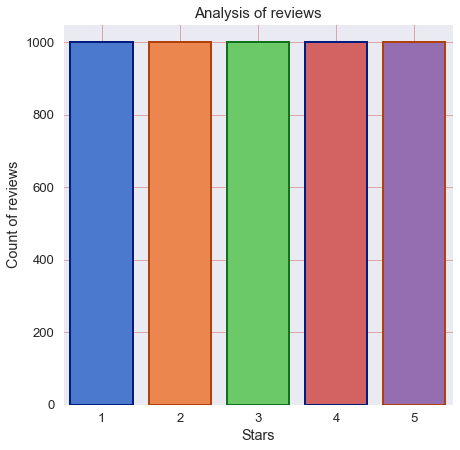

In [16]:
sns.set(context='notebook',style='darkgrid',palette='muted',font='sans-serif',font_scale=1.0)
plt.figure(figsize=(7,7), facecolor = 'white',edgecolor = 'white',frameon = True)

sns.set_context("paper", font_scale=1.5) 
sns.countplot(data = dataset_dev, x = 'stars', orient= "v",saturation=0.95,linewidth=2,edgecolor=sns.color_palette("dark", 3))
plt.title('Analysis of reviews',fontdict = {'fontsize': 15,'fontweight' :2, 'verticalalignment': 'baseline'})
plt.xlabel('Stars')
plt.ylabel('Count of reviews')
#plt.legend(loc='upper right' ,title = 'Cant. ambientes')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

Selecciono y muestro un registro al azar:

In [17]:
index_random = np.random.randint(0,4999)    #todos los registros
review_b = dataset_dev.review_body[index_random]    # selecciono uno al azar
print(index_random, review_b)

4395 No se empañan y tienen buena vision. La sujeción también es buena.


Tokenizo un registro

In [21]:
review_b_st = nltk.sent_tokenize(dataset_dev.review_body[index_random])
review_b_st

['No se empañan y tienen buena vision.', 'La sujeción también es buena.']

Ahora tomo un registro y lo convierto en un arreglo de palabras

In [23]:
# Toma un registro y convierte su titular en un arreglo de palabras
review_b_wt = nltk.word_tokenize(dataset_dev.review_body[index_random])
review_b_wt

['No',
 'se',
 'empañan',
 'y',
 'tienen',
 'buena',
 'vision',
 '.',
 'La',
 'sujeción',
 'también',
 'es',
 'buena',
 '.']

Importo los stop words en español

In [24]:
stopwords = nltk.corpus.stopwords
spanish_stopwords = stopwords.words('spanish')
spanish_stopwords 

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [25]:
dataset_dev.review_body

0       Malisimo, muy grande demasiado aparatoso y mal...
1               No he recibido el pedido no la devolución
2       Tengo que buscar otro sistema, este no funcion...
3       Utilicé las brocas de menor diámetro y se me d...
4              No me gusta su olor a viejo y aspecto malo
                              ...                        
4995    Me ha encantado la cesta. Ha llegado impecable...
4996                   Desempeña su función correctamente
4997    Me ha encantado la diadema! Las flores son tal...
4998    A mi me gustan mucho las fundas TPU, ya que so...
4999    El artículo ha cumplido con las expectativas q...
Name: review_body, Length: 5000, dtype: object